# K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection

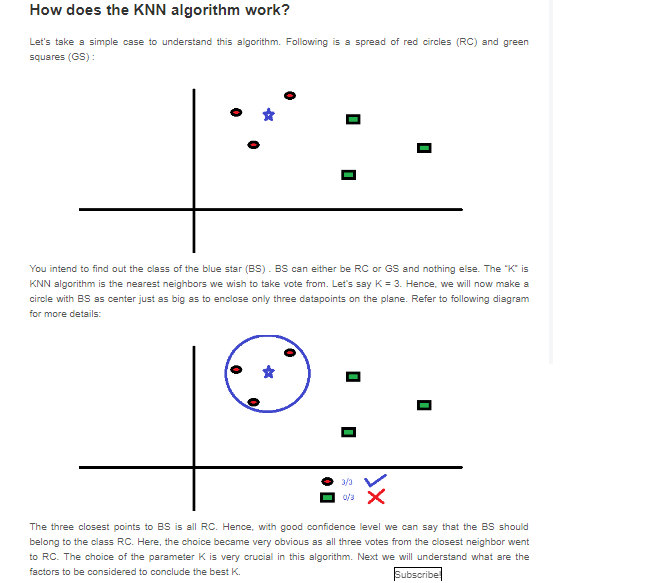

In [3]:
from IPython.display import Image
Image(filename=r"E:\ML\KNN-Regression-and-Classification\KNN.png")


# K Nearest Neighbour Classifier

In [5]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter

In [9]:
# Import dataset


df=pd.read_csv(r'E:\ML\KNN-Regression-and-Classification\Iris.csv')
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.5,2.3,1.3,0.3,setosa
1,5.7,4.4,1.5,0.4,setosa
2,7.9,3.8,6.4,2.0,virginica
3,7.7,3.8,6.7,2.2,virginica
4,7.7,2.6,6.9,2.3,virginica


In [10]:
# Splitting data into 70:30 train:test ratio
df_X=df.iloc[:,:4]
df_Y=df.iloc[:,4]
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.3,random_state=33)

In [11]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [12]:

# Function to return the list of distances of the test records from train records
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance
# Predict the output of the categorical variables based on K nearest neighbours 
# Output is the most frequent class among K nearest neighbours
def predictOutputCategorical(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        votes={}
        for j in i:
            if j[-1] in votes.keys():
                votes[j[-1]]=votes[j[-1]]+1
            else:
                votes[j[-1]]=1
        responses.append(sorted(votes,key=votes.get,reverse=True)[0])
    return responses
# Predict the output of the numeric variables based on K nearest neighbours
# Output is the mean of the K nearest neighbours
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses
# Accuarcy of the categorical predictions 
def getAccuracyCategorical(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)
# Accuarcy of the numerical predictions
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

In [13]:
# Predict species
output=predictOutputCategorical(X_train,Y_train,X_test,3)
getAccuracyCategorical(Y_test,output)

95.56


# Fit model using in built sklearn function


In [14]:
model=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
# Accuracy of the model
print('Accuracy: {:^0.2f}'.format(metrics.accuracy_score(Y_test,model.predict(X_test))*100))

Accuracy: 95.56


In [16]:
# Check whether the both outputs are same or not
# They are same as displayed below
output==model.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

# K Nearest Neighbour Regressior

In [17]:
# Import dataset

df=pd.read_csv(r'E:\ML\KNN-Regression-and-Classification\Freshmen.csv')
df.head()

,GPA,Miles from Home,College,Accommodations,Years Off,Part-Time Work Hours,Attends Office Hours,High School GPA
0,0.73,253,Social Sciences,Dorm,4,35,Sometimes,3.23
1,1.60,143,Social Sciences,Dorm,5,30,Never,2.35
2,2.17,171,Social Sciences,Dorm,0,25,Never,3.95
3,1.02,332,Sciences,Off-campus,5,30,Sometimes,3.44
4,3.14,112,Business,Dorm,0,25,Sometimes,3.20


In [18]:
# Change the data types of the categorical variables accordingly
df.College=df.College.astype('category')
df.Accommodations=df.Accommodations.astype('category')
df['Attends Office Hours']=df['Attends Office Hours'].astype('category')

In [19]:
# Generate dummy values of the categorical variables and drop one (i.e. n-1 dummies for n categories)
df_dummies=pd.get_dummies(df,drop_first=True)
# Display top 5 records
df_dummies.head()

,GPA,Miles from Home,Years Off,Part-Time Work Hours,High School GPA,College_Engineering,College_Liberal Arts,College_Sciences,College_Social Sciences,Accommodations_Off-campus,Accommodations_Other,Attends Office Hours_Regularly,Attends Office Hours_Sometimes
0,0.73,253,4,35,3.23,0,0,0,1,0,0,0,1
1,1.60,143,5,30,2.35,0,0,0,1,0,0,0,0
2,2.17,171,0,25,3.95,0,0,0,1,0,0,0,0
3,1.02,332,5,30,3.44,0,0,1,0,1,0,0,1
4,3.14,112,0,25,3.20,0,0,0,0,0,0,0,1


In [20]:
# Specifying the X and Y
X_train=df_dummies.iloc[:,1:]
Y_train=df_dummies.GPA

In [21]:
# Splitting data into 70:30 train:test ratio
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=33)

In [22]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [23]:
# Predict GPA
output=predictOutputNumeric(X_train,Y_train,X_test,3)
print('Accuracy from the code: {:^0.2f}'.format(getAccuracyNumeric(Y_test,output),2))

Accuracy from the code: 99.94


# using scikit learn

In [24]:
model=KNeighborsRegressor(n_neighbors=3,p=2)
model.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
print('Accuracy from the model {:^0.2f}'.
      format(metrics.mean_squared_error(Y_test,model.predict(X_test))*100))

Accuracy from the model 99.88


In [26]:
# Check whether both the outputs are same or not
# They are not same - Need to find why?
output==model.predict(X_test)

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False])